In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from enterprise.pulsar import Pulsar

You'll need sksparse for get_coefficients() with common signals!


In [2]:
import sys
sys.path.insert(0,'/Users/hazboun/software_development/la_forge/')
from la_forge.utils import epoch_ave_resid

In [3]:
psrname = 'B1855+09'#'J2317+1439'#'J1600-3053'#
filepath = './no_dmx_pickles/'
filepath += '{0}_ng12p5yr_v3_nodmx_ePSR.pkl'.format(psrname)
with open(filepath,'rb') as fin:
    psr=pickle.load(fin)

In [4]:
sec_to_day = 24*3600

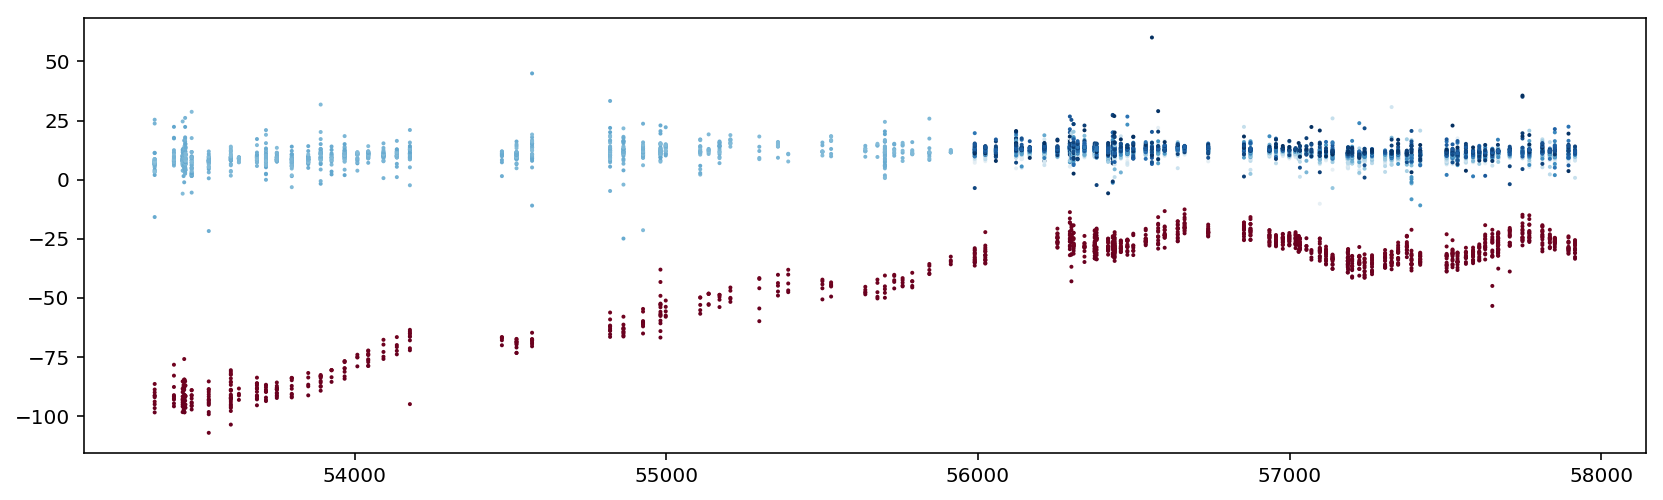

In [5]:
plt.figure(figsize=[14,4])
plt.scatter(x=psr.toas/sec_to_day,
            y=psr.residuals*1e6,
            s=1,
            c=psr.freqs,cmap='RdBu')
plt.show()

In [6]:
#Load DMX values
dtypes = {'names': ('DMXEP', 'DMX_value', 'DMX_var_err', 
                    'DMXR1', 'DMXR2', 'DMXF1', 
                    'DMXF2', 'DMX_bin'),
          'formats': ('f4','f4','f4','f4','f4','f4','f4','U6')}
dmx = np.loadtxt('./dmx/{0}_NANOGrav_12yv3.dmx'.format(psrname),
                 skiprows=4,
                 dtype=dtypes)

In [7]:
bins = np.abs(np.array(dmx[['DMXR1','DMXR2']].tolist())
              - np.array([dmx['DMXEP'],dmx['DMXEP']]).T)

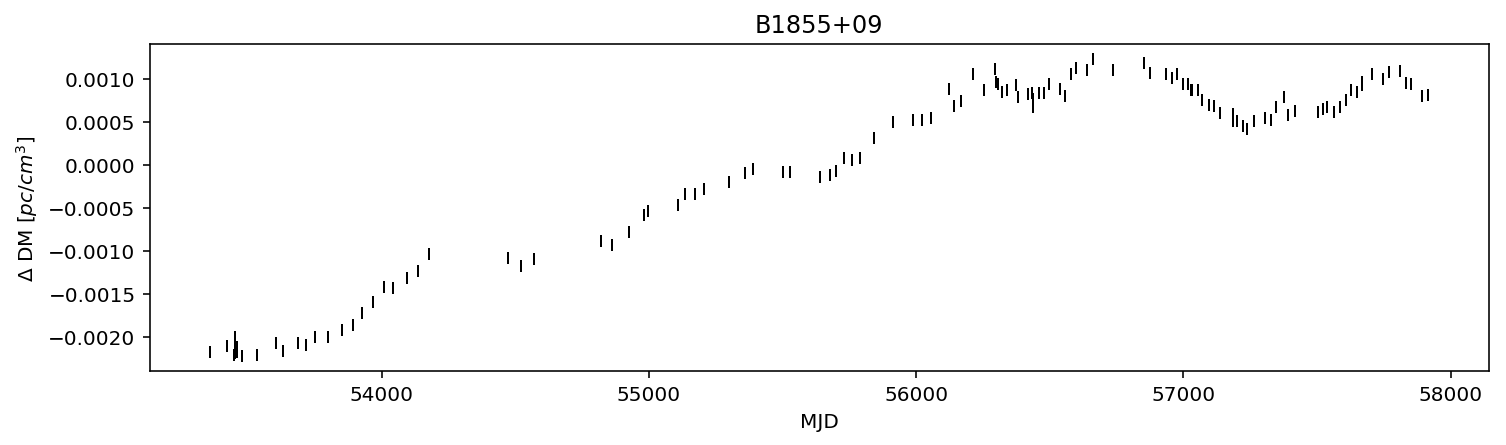

In [8]:
plt.figure(figsize=[12,3])
plt.errorbar(x = dmx['DMXEP'],
             xerr=bins.T,
             y = dmx['DMX_value']-dmx['DMX_value'].mean(),
             yerr=dmx['DMX_var_err'],
             marker = None, color='k',linestyle='none',elinewidth=1,)
# plt.ylim(0.001,0.002)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ DM [$pc/cm^3$]')
plt.title(psrname)
plt.show()

In [9]:
resids,msks=epoch_ave_resid(psr,dt=0.5)
resids.keys()

dict_keys(['430', 'L-wide'])

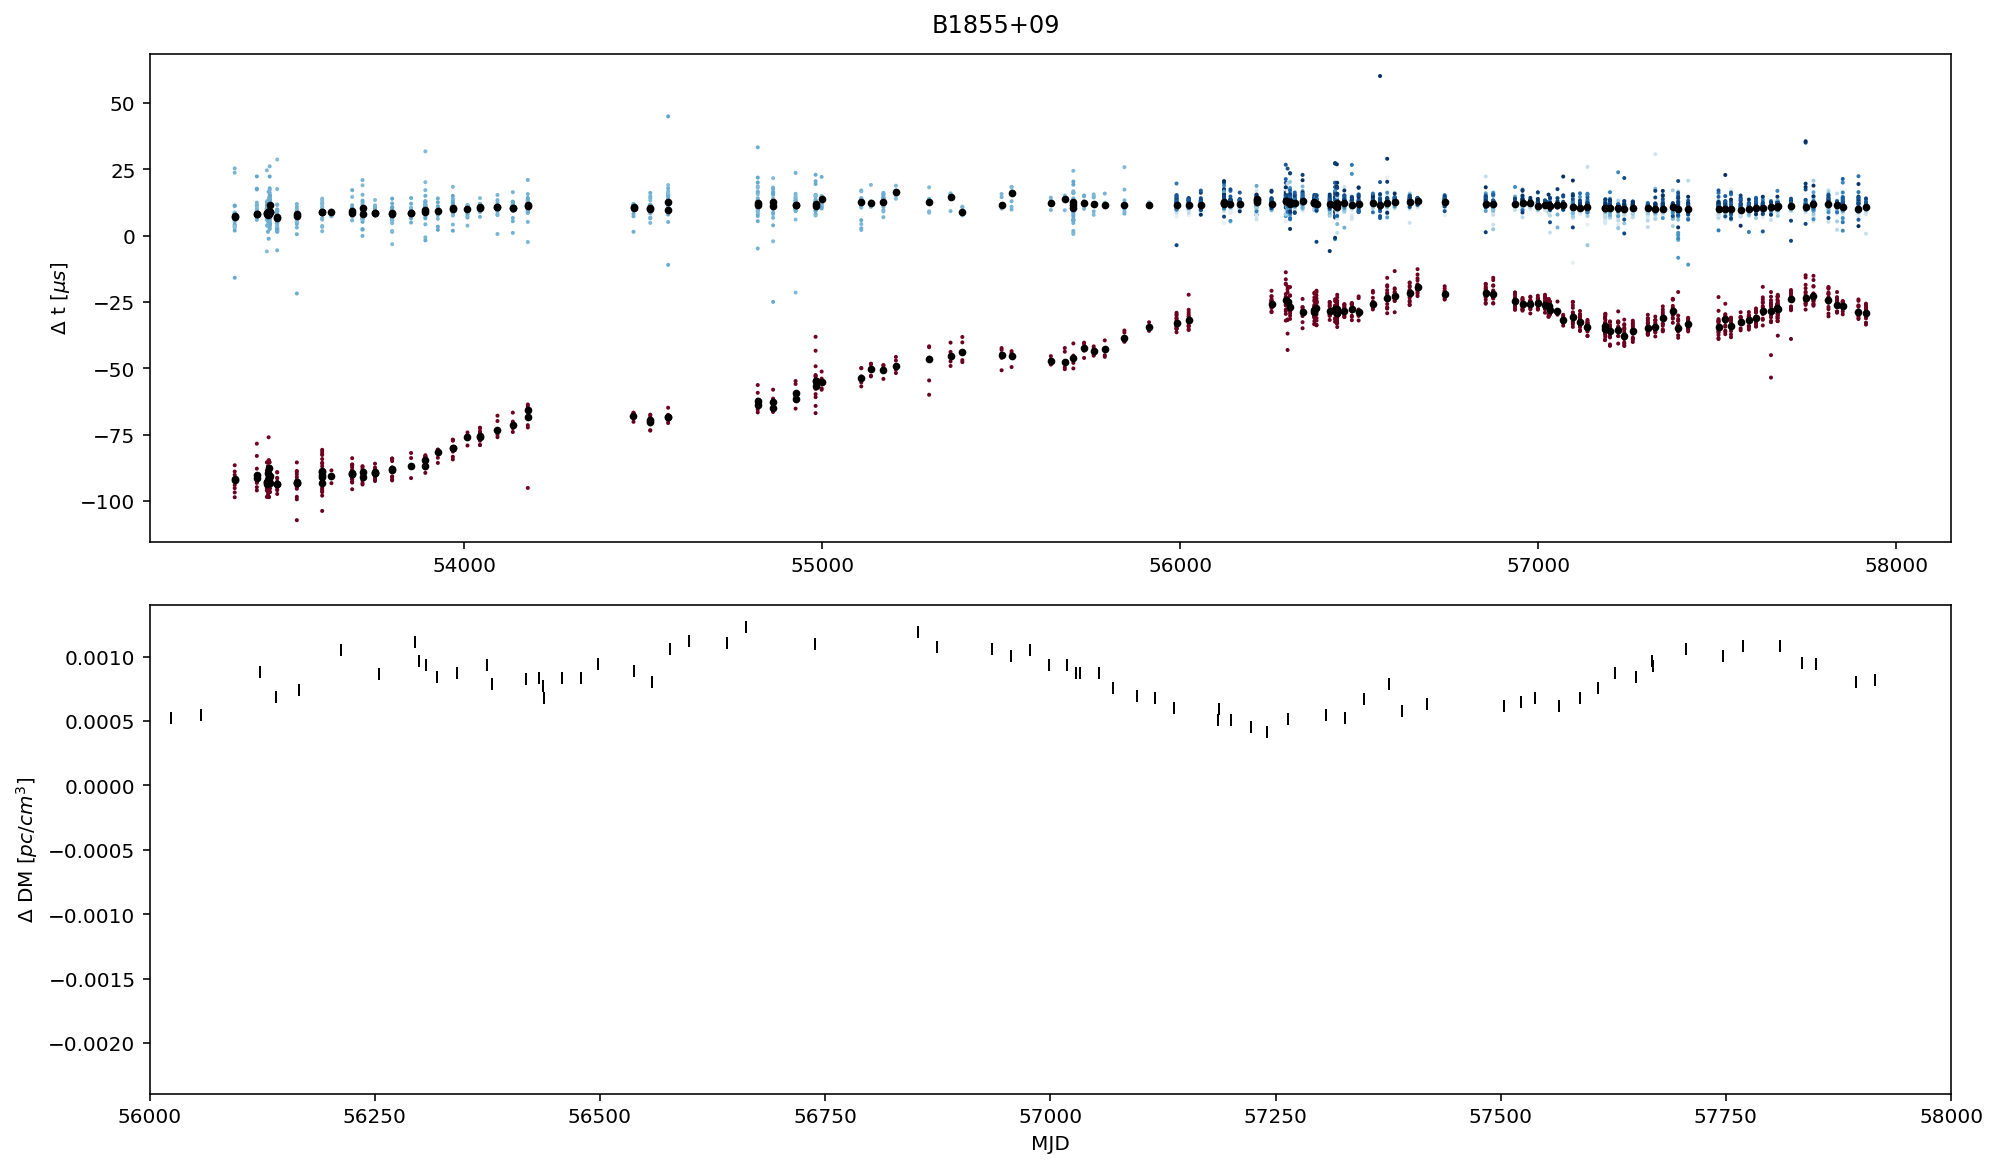

In [10]:
fig=plt.figure(figsize=[14,8])

fig.add_subplot(211)
plt.scatter(x=psr.toas/sec_to_day,
            y=psr.residuals*1e6,#*psr.freqs**2*2.41e-4,
            s=1,
            c=psr.freqs,cmap='RdBu')
#epoch averaged residuals
plt.scatter(x=resids['430'][:,0]/sec_to_day,
            y=resids['430'][:,1]*1e6,
            s=8,c='k')
"""plt.scatter(x=resids['Rcvr1_2'][:,0]/sec_to_day,
            y=resids['Rcvr1_2'][:,1]*1e6,
            s=8,c='k')"""
plt.scatter(x=resids['L-wide'][:,0]/sec_to_day,
            y=resids['L-wide'][:,1]*1e6,
            s=8,c='k')
"""plt.scatter(x=resids['S-wide'][:,0]/sec_to_day,
            y=resids['S-wide'][:,1]*1e6,
            s=8,c='k')"""

plt.ylabel(r'$\Delta$ t [$\mu s$]')
# plt.xlim(56800,56875)
# plt.ylim(-55,0)

fig.add_subplot(212)
plt.errorbar(x = dmx['DMXEP'],
             xerr=bins.T,
             y = dmx['DMX_value']-dmx['DMX_value'].mean(),
#              yerr=dmx['DMX_var_err'],
             marker = '|', color='k',linestyle='none',elinewidth=1,)
# plt.ylim(0.001,0.002)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ DM [$pc/cm^3$]')
plt.xlim(56000,58000)
fig.suptitle(psrname,y=1.01)
fig.tight_layout()
plt.show()

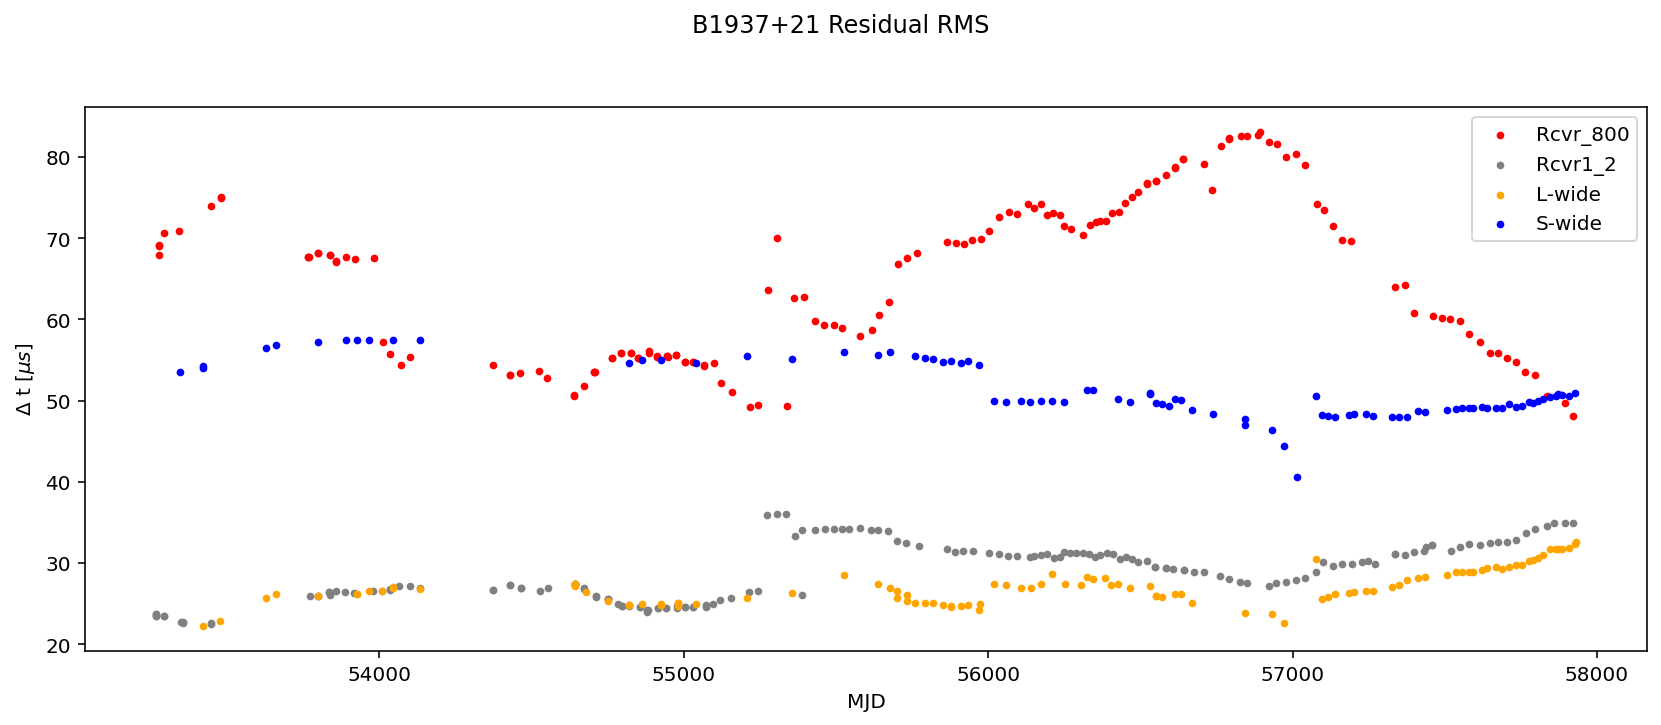

In [11]:
fig=plt.figure(figsize=[14,5])

fig.add_subplot(111)
plt.scatter(x=resids['Rcvr_800'][:,0]/sec_to_day,
            y=resids['Rcvr_800'][:,3]*1e6,
            s=8,c='red',label='Rcvr_800')
plt.scatter(x=resids['Rcvr1_2'][:,0]/sec_to_day,
            y=resids['Rcvr1_2'][:,3]*1e6,
            s=8,c='gray',label='Rcvr1_2')
plt.scatter(x=resids['L-wide'][:,0]/sec_to_day,
            y=resids['L-wide'][:,3]*1e6,
            s=8,c='orange',label='L-wide')
plt.scatter(x=resids['S-wide'][:,0]/sec_to_day,
            y=resids['S-wide'][:,3]*1e6,
            s=8,c='blue',label='S-wide')
# plt.xlim(56000,58000)
fig.suptitle(psrname+' Residual RMS',y=1.01)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ t [$\mu s$]')
plt.legend()
plt.show()

In [12]:
fullpta_path = '../12p5yr/channelized_12yr_v3_partim_py3.pkl'
with open(fullpta_path,'rb') as fin:
    psrs=pickle.load(fin)

In [13]:
psrnames = [p.name for p in psrs]

In [14]:
pidx = psrnames.index(psrname)
psr_dmx = psrs[pidx]

In [15]:
resids2,msks2=epoch_ave_resid(psr_dmx)
resids2.keys()

dict_keys(['430', 'L-wide'])

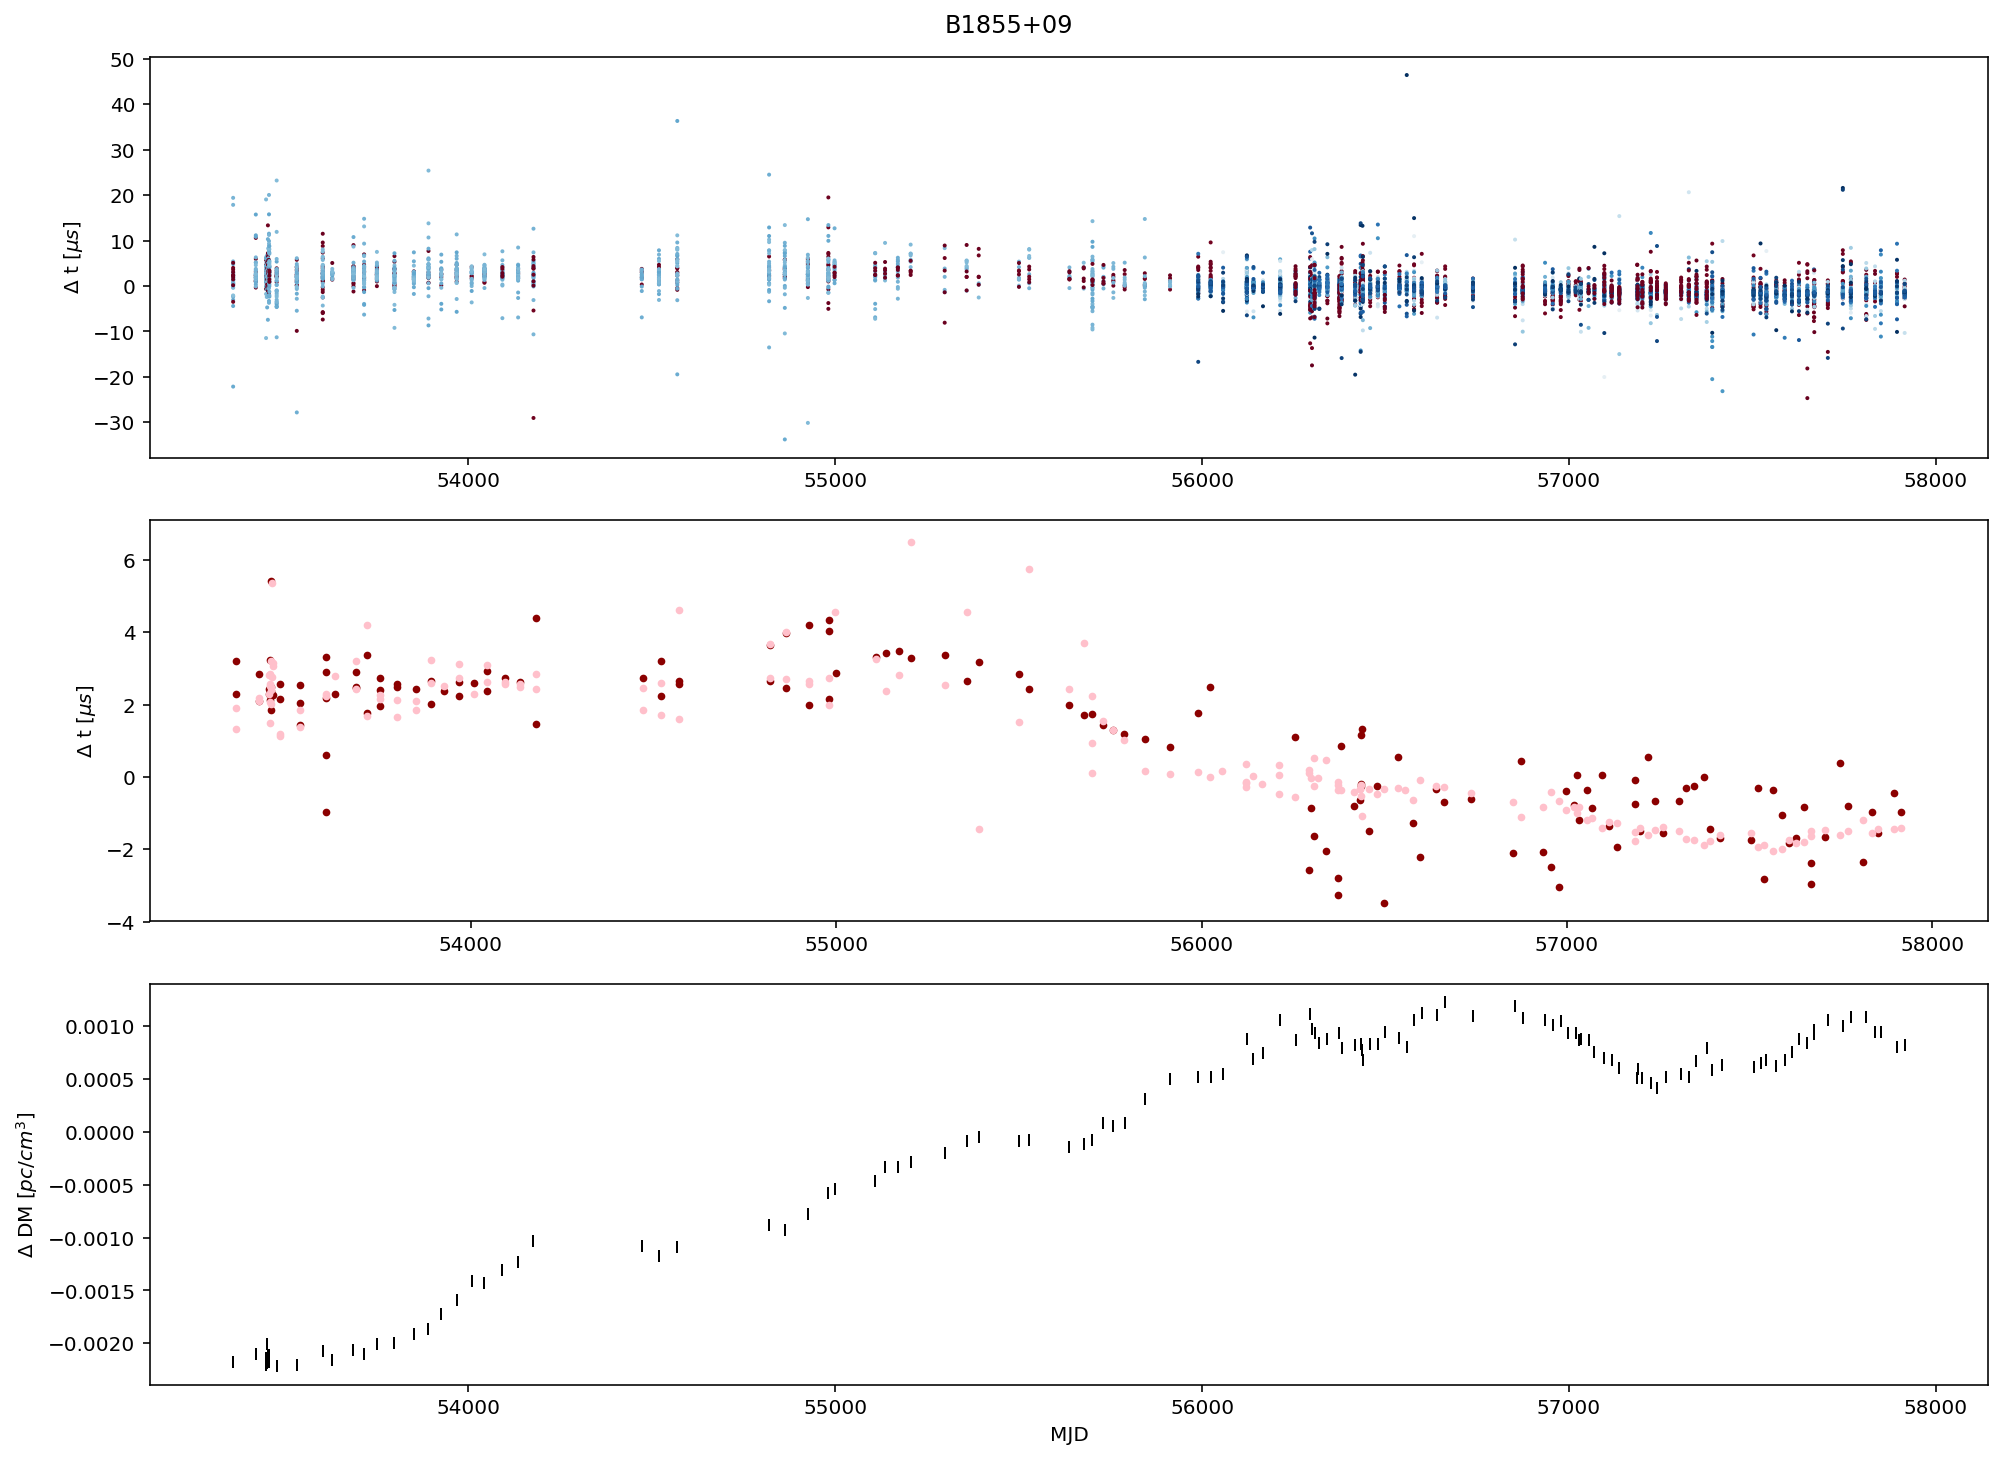

In [16]:
fig=plt.figure(figsize=[14,10])

fig.add_subplot(311)
plt.scatter(x=psr_dmx.toas/sec_to_day,
            y=psr_dmx.residuals*1e6,#*psr.freqs**2*2.41e-4,
            s=1,
            c=psr_dmx.freqs,cmap='RdBu')
plt.ylabel(r'$\Delta$ t [$\mu s$]')
# plt.xlim(56000,58000)

fig.add_subplot(312)
plt.scatter(x=resids2['430'][:,0]/sec_to_day,
            y=resids2['430'][:,1]*1e6,
            s=8,c='darkred')
"""plt.scatter(x=resids2['Rcvr1_2'][:,0]/sec_to_day,
            y=resids2['Rcvr1_2'][:,1]*1e6,
            s=8,c='pink')"""
plt.scatter(x=resids2['L-wide'][:,0]/sec_to_day,
            y=resids2['L-wide'][:,1]*1e6,
            s=8,c='pink')
"""plt.scatter(x=resids2['S-wide'][:,0]/sec_to_day,
            y=resids2['S-wide'][:,1]*1e6,
            s=8,c='C0')"""

plt.ylabel(r'$\Delta$ t [$\mu s$]')

fig.add_subplot(313)
plt.errorbar(x = dmx['DMXEP'],
             xerr=bins.T,
             y = dmx['DMX_value']-dmx['DMX_value'].mean(),
             yerr=dmx['DMX_var_err'],
             marker = None, color='k',linestyle='none',elinewidth=1,)
# plt.ylim(0.001,0.002)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ DM [$pc/cm^3$]')
# plt.xlim(56000,58000)
fig.suptitle(psrname,y=1.01)
fig.tight_layout()
plt.show()

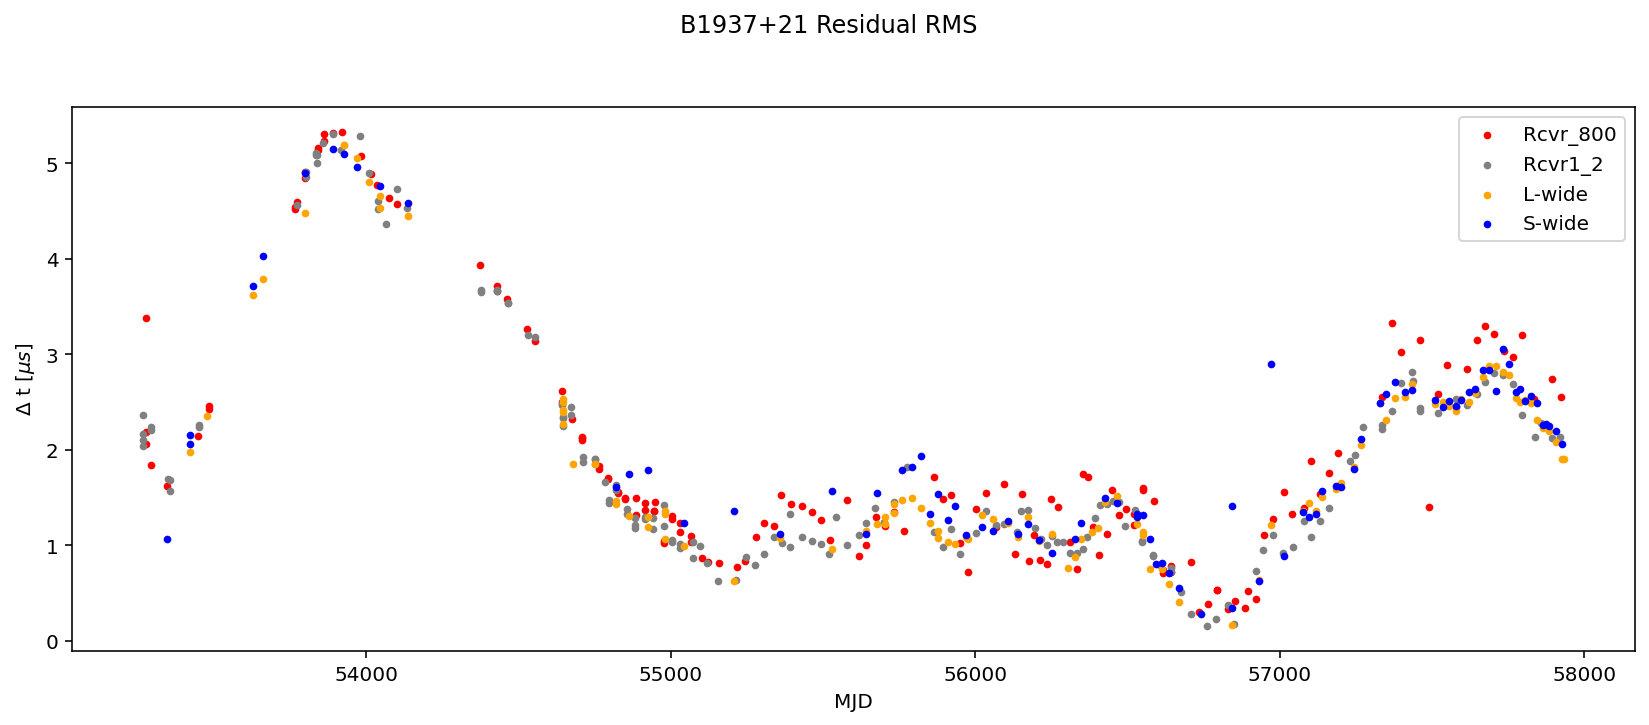

In [17]:
fig=plt.figure(figsize=[14,5])

fig.add_subplot(111)
plt.scatter(x=resids2['Rcvr_800'][:,0]/sec_to_day,
            y=resids2['Rcvr_800'][:,3]*1e6,
            s=8,c='red',label='Rcvr_800')
plt.scatter(x=resids2['Rcvr1_2'][:,0]/sec_to_day,
            y=resids2['Rcvr1_2'][:,3]*1e6,
            s=8,c='gray',label='Rcvr1_2')
plt.scatter(x=resids2['L-wide'][:,0]/sec_to_day,
            y=resids2['L-wide'][:,3]*1e6,
            s=8,c='orange',label='L-wide')
plt.scatter(x=resids2['S-wide'][:,0]/sec_to_day,
            y=resids2['S-wide'][:,3]*1e6,
            s=8,c='blue',label='S-wide')
# plt.xlim(56000,58000)
fig.suptitle(psrname+' Residual RMS',y=1.01)
plt.xlabel('MJD')
plt.ylabel(r'$\Delta$ t [$\mu s$]')
plt.legend()
plt.show()

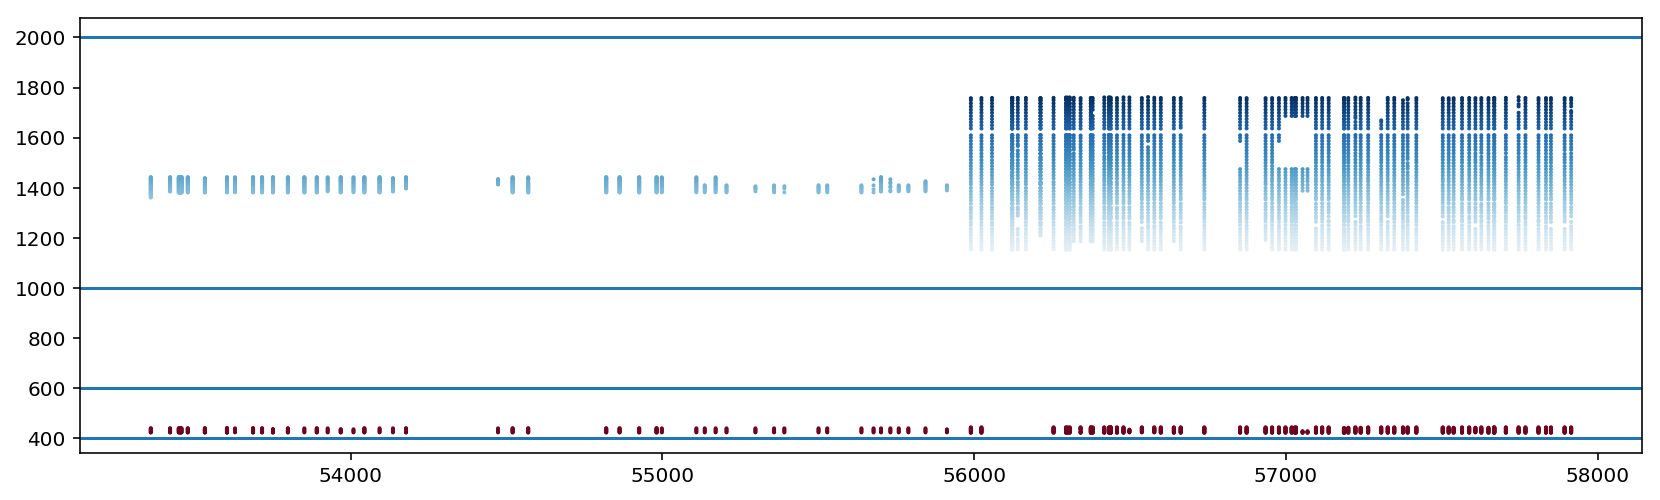

In [18]:
sec_to_day = 24*3600
plt.figure(figsize=[14,4])
plt.scatter(x=psr.toas/sec_to_day,
            y=psr.freqs,
            s=1,
            c=psr.freqs,cmap='RdBu')
# plt.xlim(57000,58000)

plt.show()

In [19]:
np.unique(psr.flags['fe'])

array(['430', 'L-wide'], dtype='<U32')